In [76]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import datasets, linear_model
%matplotlib inline
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, RepeatedKFold, ShuffleSplit, StratifiedKFold


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Download and reading iris data

In [53]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

In [54]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standard train and test split

In [55]:
# Train- Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.7, random_state=10)

In [56]:
# Define the Classifier object
clf = tree.DecisionTreeClassifier()
# Train the classifier with the training data
clf = clf.fit(X_train, Y_train)

In [57]:
# Prediction
Y_pred = clf.predict(X_test)

print('Accuracy on test data is %.2f' % (accuracy_score(Y_test, Y_pred)))

Accuracy on test data is 0.95


In [65]:
# ROC_AUC_Score 
roc_auc_score(Y_train, clf.predict_proba(X_train), multi_class='ovr',average='macro')

1.0

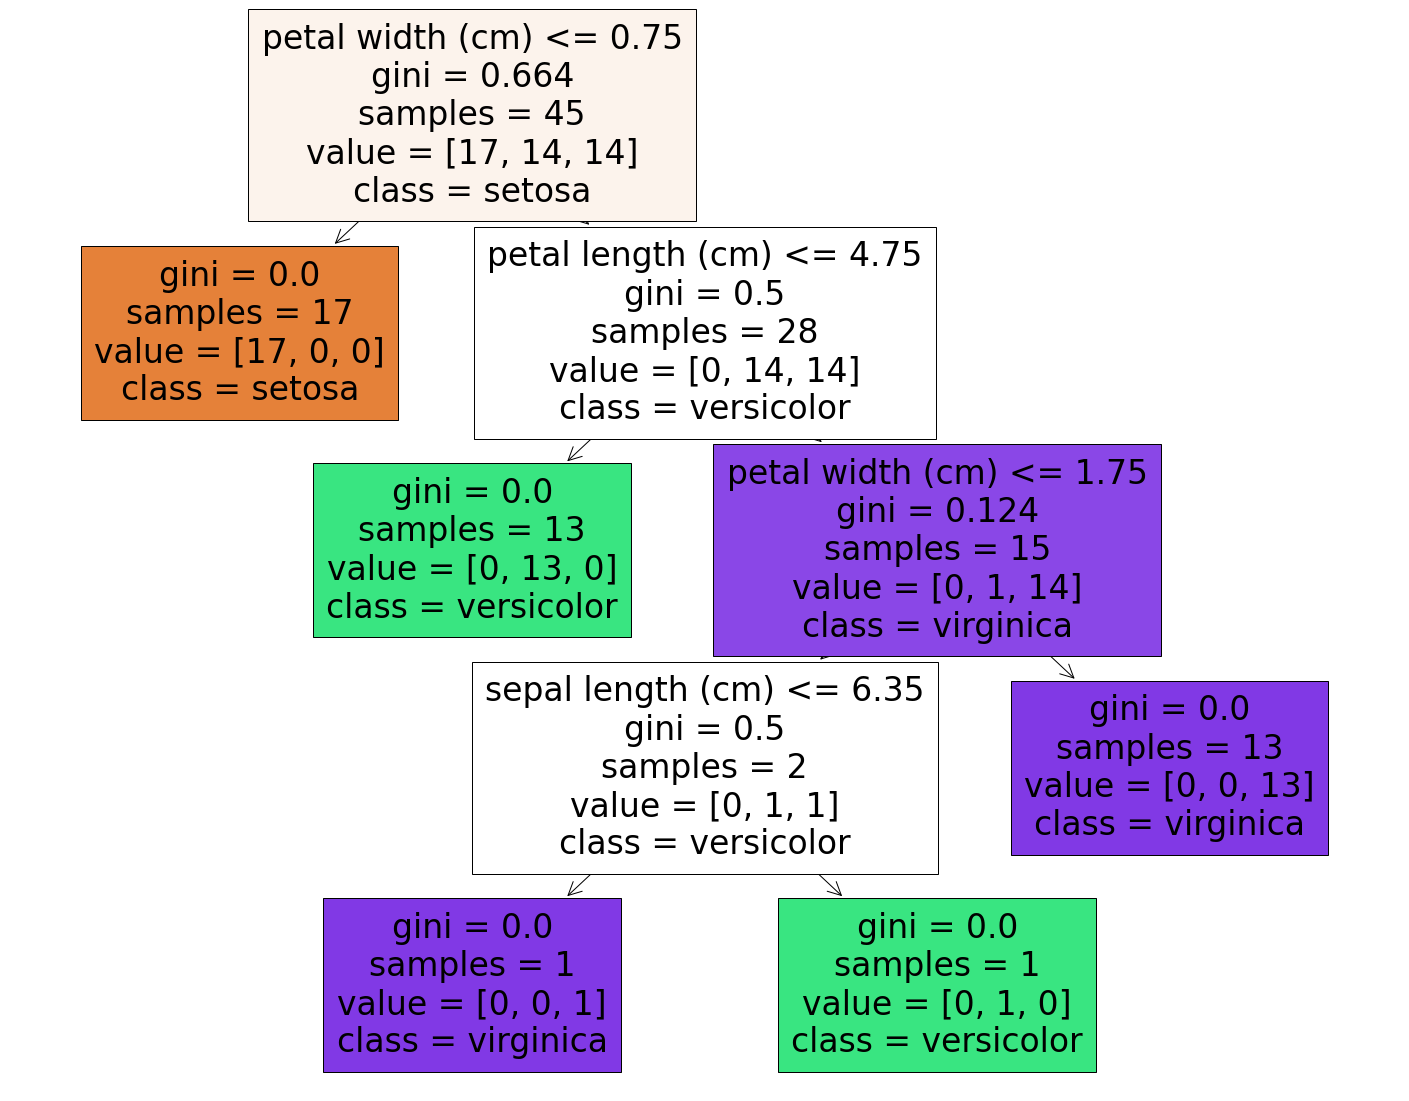

In [23]:
# Visualize the Tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

## Overfitting and Underfitting : Challenges faced during designing the ML algorithm.
- Refers to a state when the model has learned from the training data too well, which makes the model under perform for the test data. Overfitting has high variance and underfitting has high bias.

## How to overcome overfitting and underfitting:- 
### There are many ways:-
#### a) Hyperparameter Tuning 
#### b) Augmented Data
#### c) Dimension Reduction (Capturing relevant features only)
#### d) Regularization (L1 or L2 or Dropout ratio(Deep learning))

##### https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/
##### https://towardsdatascience.com/what-are-overfitting-and-underfitting-in-machine-learning-a96b30864690

Text(0, 0.5, 'Accuracy')

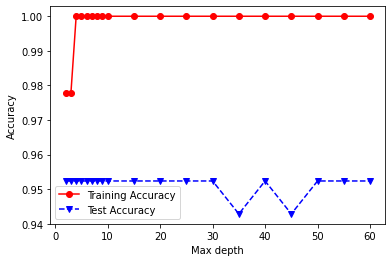

In [28]:
# Define classifiers for various tree depths. 
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

## Good fit example

Text(0, 0.5, 'Accuracy')

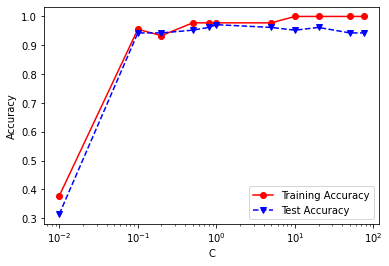

In [29]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50, 75]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

## Cross Validation

### Listed few most used cv techniques:
#### a) K Fold: Divide all the data instances into K number of group samples 
#### b) Repreated Fold: Repeat the K Fold for n times
#### c) ShuffleSplit: It randomly sample your dataset during each iteration to generate a training set and test set
#### d) StratifiedKFold: Same percentage of samples of each target class. Advantage remove the imbalance problem during the training step.

#### There are other CV approach: You can follow

#### https://scikit-learn.org/stable/modules/cross_validation.html
#### https://machinelearningmastery.com/k-fold-cross-validation/
#### https://www.analyticsvidhya.com/blog/2021/05/4-ways-to-evaluate-your-machine-learning-model-cross-validation-techniques-with-python-code/
#### https://neptune.ai/blog/cross-validation-in-machine-learning-how-to-do-it-right

In [70]:
kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74] [ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 13

In [73]:
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
for train, test in rkf.split(X):
    print("%s %s" % (train, test))

[  0   1   4   6   8   9  11  14  17  18  19  20  22  23  26  28  31  32
  33  35  36  37  39  42  43  44  46  53  55  57  59  61  62  64  65  67
  70  72  76  78  81  82  83  86  87  89  91  92  95 101 104 107 108 109
 112 115 117 118 120 123 124 126 129 130 133 135 136 137 138 140 141 143
 145 147 148] [  2   3   5   7  10  12  13  15  16  21  24  25  27  29  30  34  38  40
  41  45  47  48  49  50  51  52  54  56  58  60  63  66  68  69  71  73
  74  75  77  79  80  84  85  88  90  93  94  96  97  98  99 100 102 103
 105 106 110 111 113 114 116 119 121 122 125 127 128 131 132 134 139 142
 144 146 149]
[  2   3   5   7  10  12  13  15  16  21  24  25  27  29  30  34  38  40
  41  45  47  48  49  50  51  52  54  56  58  60  63  66  68  69  71  73
  74  75  77  79  80  84  85  88  90  93  94  96  97  98  99 100 102 103
 105 106 110 111 113 114 116 119 121 122 125 127 128 131 132 134 139 142
 144 146 149] [  0   1   4   6   8   9  11  14  17  18  19  20  22  23  26  28  31  32
  33  35 

In [75]:
ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
for train_index, test_index in ss.split(X):
    print("%s %s" % (train_index, test_index))

[ 61  92 112   2 141  43  10  60 116 144 119 108  69 135  56  80 123 133
 106 146  50 147  85  30 101  94  64  89  91 125  48  13 111  95  20  15
  52   3 149  98   6  68 109  96  12 102 120 104 128  46  11 110 124  41
 148   1 113 139  42   4 129  17  38   5  53 143 105   0  34  28  55  75
  35  23  74  31 118  57 131  65  32 138  14 122  19  29 130  49 136  99
  82  79 115 145  72  77  25  81 140 142  39  58  88  70  87  36  21   9
 103  67 117  47] [114  62  33 107   7 100  40  86  76  71 134  51  73  54  63  37  78  90
  45  16 121  66  24   8 126  22  44  97  93  26 137  84  27 127 132  59
  18  83]
[ 49  62  74  17 106   8 135  80 107  90   0  36 112   5  57 102  55  34
 128  33  21  73   7  45 129 103 146 120  94  50 134  99 126 114   9  39
  97 101  29  81  20  46  51  53  23  27   2  28  37 111  10  84 137 127
  43  87  69 144 140  35  76   3  82 145 116  88  44 147   1  93  38  11
 115  54  40  18  41  79  24  56  71  13  31  85  70 132 125 123 100  32
 104  83 117 118 138  2

In [77]:
skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(X, y):
    print('train -  {}   |   test -  {}'.format(
        np.bincount(y[train]), np.bincount(y[test])))


train -  [33 33 34]   |   test -  [17 17 16]
train -  [33 34 33]   |   test -  [17 16 17]
train -  [34 33 33]   |   test -  [16 17 17]
